In [1]:
import os
from pathlib import Path

In [2]:
dataset_path = Path("../../data/downloads/segmentation/acute_lymphoblastic_leukemia_ALL")

def explore_folder_structure(dataset_path):
    print(f"Exploring folder structure in: {dataset_path}")
    for root, dirs, files in os.walk(dataset_path):
        root_dir = Path(root).relative_to(dataset_path)
        print(f"\nDirectory: {root_dir}")
        for file in files[:5]:  
            print(f"    {file}")
            
explore_folder_structure(dataset_path)

Exploring folder structure in: ..\..\data\downloads\segmentation\acute_lymphoblastic_leukemia_ALL

Directory: .

Directory: Original

Directory: Original\Benign
    WBC-Benign-001.jpg
    WBC-Benign-002.jpg
    WBC-Benign-003.jpg
    WBC-Benign-004.jpg
    WBC-Benign-005.jpg

Directory: Original\Early
    WBC-Malignant-Early-001.jpg
    WBC-Malignant-Early-002.jpg
    WBC-Malignant-Early-003.jpg
    WBC-Malignant-Early-004.jpg
    WBC-Malignant-Early-005.jpg

Directory: Original\Pre
    WBC-Malignant-Pre-001.jpg
    WBC-Malignant-Pre-002.jpg
    WBC-Malignant-Pre-003.jpg
    WBC-Malignant-Pre-004.jpg
    WBC-Malignant-Pre-005.jpg

Directory: Original\Pro
    WBC-Malignant-Pro-001.jpg
    WBC-Malignant-Pro-002.jpg
    WBC-Malignant-Pro-003.jpg
    WBC-Malignant-Pro-004.jpg
    WBC-Malignant-Pro-005.jpg

Directory: Segmented

Directory: Segmented\Benign
    WBC-Benign-001.jpg
    WBC-Benign-002.jpg
    WBC-Benign-003.jpg
    WBC-Benign-004.jpg
    WBC-Benign-005.jpg

Directory: Segmented

Dataset Structure:

1. Original/:

        Contains raw images of benign and malignant cells at different stages: Benign, Early, Pre, Pro.

2. Segmented/:

        Contains segmented images corresponding to the original images in the Original/ folder. These are likely the ground truth masks (segmented regions showing the areas of interest, like cancer cells).

In [3]:
from PIL import Image
import os
from pathlib import Path


original_path = Path("../../data/downloads/segmentation/acute_lymphoblastic_leukemia_ALL/Original")
segmented_path = Path("../../data/downloads/segmentation/acute_lymphoblastic_leukemia_ALL/Segmented")


def check_image_mask_pairs(original_path, segmented_path):
    for category in ["Benign", "Early", "Pre", "Pro"]:
        original_dir = original_path / category
        segmented_dir = segmented_path / category
        print(f"\nChecking {category} category:")
        
        original_images = list(original_dir.glob("*.jpg"))
        segmented_images = list(segmented_dir.glob("*.jpg"))
        
        
        for orig_img in original_images:
            mask_name = orig_img.name
            corresponding_mask = segmented_dir / mask_name
            
            if corresponding_mask in segmented_images:
                print(f"Pair found: {orig_img.name} -> {corresponding_mask.name}")
            else:
                print(f"⚠️ No mask found for {orig_img.name}")


check_image_mask_pairs(original_path, segmented_path)



Checking Benign category:
Pair found: WBC-Benign-001.jpg -> WBC-Benign-001.jpg
Pair found: WBC-Benign-002.jpg -> WBC-Benign-002.jpg
Pair found: WBC-Benign-003.jpg -> WBC-Benign-003.jpg
Pair found: WBC-Benign-004.jpg -> WBC-Benign-004.jpg
Pair found: WBC-Benign-005.jpg -> WBC-Benign-005.jpg
Pair found: WBC-Benign-006.jpg -> WBC-Benign-006.jpg
Pair found: WBC-Benign-007.jpg -> WBC-Benign-007.jpg
Pair found: WBC-Benign-008.jpg -> WBC-Benign-008.jpg
Pair found: WBC-Benign-009.jpg -> WBC-Benign-009.jpg
Pair found: WBC-Benign-010.jpg -> WBC-Benign-010.jpg
Pair found: WBC-Benign-011.jpg -> WBC-Benign-011.jpg
Pair found: WBC-Benign-012.jpg -> WBC-Benign-012.jpg
Pair found: WBC-Benign-013.jpg -> WBC-Benign-013.jpg
Pair found: WBC-Benign-014.jpg -> WBC-Benign-014.jpg
Pair found: WBC-Benign-015.jpg -> WBC-Benign-015.jpg
Pair found: WBC-Benign-016.jpg -> WBC-Benign-016.jpg
Pair found: WBC-Benign-017.jpg -> WBC-Benign-017.jpg
Pair found: WBC-Benign-018.jpg -> WBC-Benign-018.jpg
Pair found: WBC-Ben

In [4]:
import random
from PIL import Image
import matplotlib.pyplot as plt
import mplcyberpunk
from pathlib import Path

In [5]:
original_path = Path("../../data/downloads/segmentation/acute_lymphoblastic_leukemia_ALL/Original")
segmented_path = Path("../../data/downloads/segmentation/acute_lymphoblastic_leukemia_ALL/Segmented")


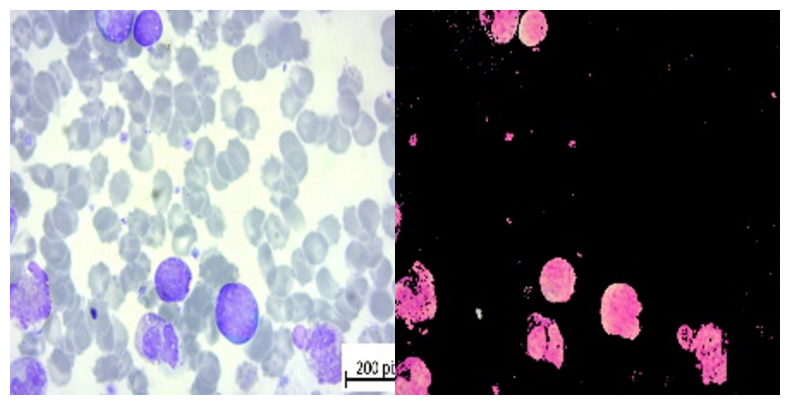

In [6]:
def create_diptych_with_cyberpunk():

    category = random.choice(["Benign", "Early", "Pre", "Pro"])

    original_dir = original_path / category
    segmented_dir = segmented_path / category
    
    original_image = random.choice(list(original_dir.glob("*.jpg")))
    segmented_image = segmented_dir / original_image.name  # Corresponding mask
    
    img1 = Image.open(original_image)
    img2 = Image.open(segmented_image)
    
    img1 = img1.resize((450, 450))
    img2 = img2.resize((450, 450))
    
    diptych = Image.new("RGB", (img1.width + img2.width, img1.height))
    diptych.paste(img1, (0, 0))
    diptych.paste(img2, (img1.width, 0))
    
    plt.figure(figsize=(10,5))
    plt.imshow(diptych)
    plt.axis('off')
    
    mplcyberpunk.add_glow_effects()
    
    plt.show()

create_diptych_with_cyberpunk()

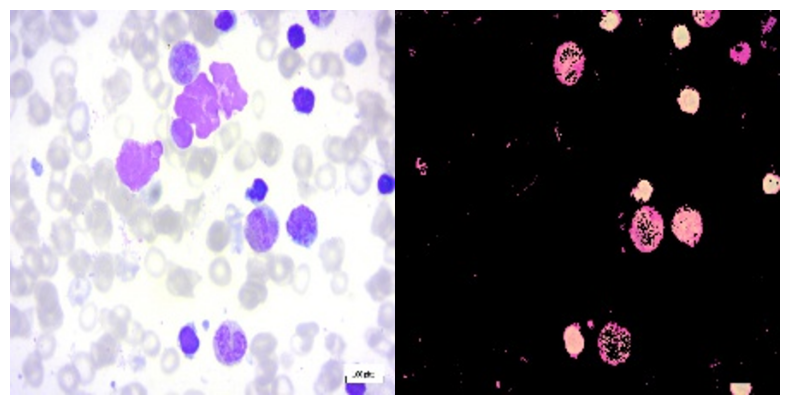

In [7]:
create_diptych_with_cyberpunk()

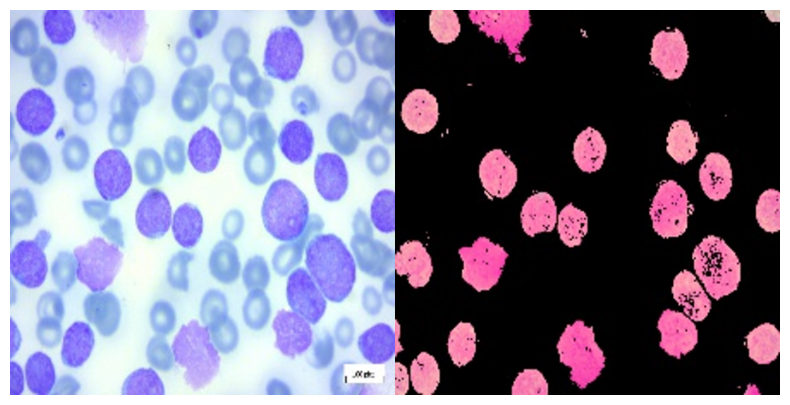

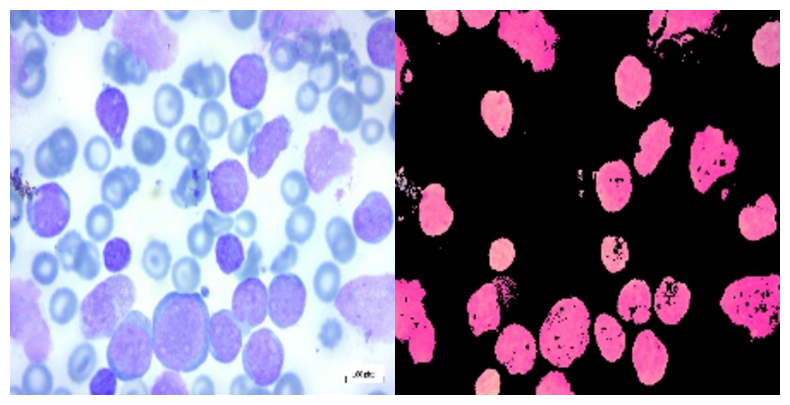

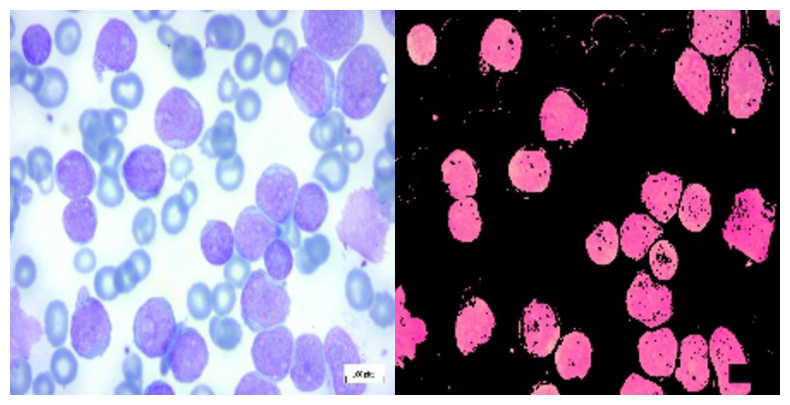

In [8]:
create_diptych_with_cyberpunk()
create_diptych_with_cyberpunk()
create_diptych_with_cyberpunk()

In [9]:
from PIL import Image
from pathlib import Path
from collections import defaultdict

In [18]:
def check_image_dimensions(image_dir):
    print(f"Checking images in {image_dir}...")

    dimension_counts = defaultdict(int)

    images = list(image_dir.glob("*.jpg"))
    
    total_images = len(images)
    print(f"Total images: {total_images}")
    
    for img_path in images:
        with Image.open(img_path) as img:
            width, height = img.size
            dimension_counts[(width, height)] += 1
    
    for dim, count in dimension_counts.items():
        print(f"    {dim[0]}x{dim[1]}: {count} images")

In [19]:
image_dir_benign = Path("../../data/downloads/segmentation/acute_lymphoblastic_leukemia_ALL/Original/Benign/")
check_image_dimensions(image_dir_benign)

Checking images in ..\..\data\downloads\segmentation\acute_lymphoblastic_leukemia_ALL\Original\Benign...
Total images: 504
    224x224: 504 images


In [20]:
image_dir_early = Path("../../data/downloads/segmentation/acute_lymphoblastic_leukemia_ALL/Original/Early/")
check_image_dimensions(image_dir_early)

image_dir_pre = Path("../../data/downloads/segmentation/acute_lymphoblastic_leukemia_ALL/Original/Pre/")
check_image_dimensions(image_dir_pre)

image_dir_pro = Path("../../data/downloads/segmentation/acute_lymphoblastic_leukemia_ALL/Original/Pro/")
check_image_dimensions(image_dir_pro)

Checking images in ..\..\data\downloads\segmentation\acute_lymphoblastic_leukemia_ALL\Original\Early...
Total images: 985
    224x224: 985 images
Checking images in ..\..\data\downloads\segmentation\acute_lymphoblastic_leukemia_ALL\Original\Pre...
Total images: 963
    224x224: 963 images
Checking images in ..\..\data\downloads\segmentation\acute_lymphoblastic_leukemia_ALL\Original\Pro...
Total images: 804
    224x224: 804 images


In [21]:
import os
import shutil
import random
from pathlib import Path

In [22]:
original_path = Path("../../data/downloads/segmentation/acute_lymphoblastic_leukemia_ALL/Original")
segmented_path = Path("../../data/downloads/segmentation/acute_lymphoblastic_leukemia_ALL/Segmented")
processed_base_path = Path("../../data/processed/segmentation/acute_lymphoblastic_leukemia_ALL")

In [23]:
train_path = processed_base_path / "train"
validation_path = processed_base_path / "validation"
test_path = processed_base_path / "test"

In [24]:
categories = ["Benign", "Early", "Pre", "Pro"]

In [29]:
def move_images_to_splits():
    for category in categories:
        # Ensure the 'Original' and 'Segmented' subfolders are created inside the split paths
        for split_path in [train_path, validation_path, test_path]:
            (split_path / "Original" / category).mkdir(parents=True, exist_ok=True)
            (split_path / "Segmented" / category).mkdir(parents=True, exist_ok=True)

        # Get lists of original and segmented images
        original_images = list((original_path / category).glob("*.jpg"))
        segmented_images = list((segmented_path / category).glob("*.jpg"))
        
        # Ensure original and segmented images match
        image_pairs = [(orig, segmented) for orig, segmented in zip(original_images, segmented_images)]
        
        # Shuffle the pairs for random split
        random.shuffle(image_pairs)
        
        # Split into 70% train, 15% validation, 15% test
        train_pairs = image_pairs[:int(0.7 * len(image_pairs))]
        val_pairs = image_pairs[int(0.7 * len(image_pairs)):int(0.85 * len(image_pairs))]
        test_pairs = image_pairs[int(0.85 * len(image_pairs)):]

        # Move images to respective folders
        for split, pairs in zip([train_path, validation_path, test_path], [train_pairs, val_pairs, test_pairs]):
            for orig_img, segmented_img in pairs:
                # Move the original and segmented images into their respective subfolders
                shutil.copy(orig_img, split / "original" / category / orig_img.name)
                shutil.copy(segmented_img, split / "segmented" / category / segmented_img.name)

        print(f"Processed category: {category}")
        print(f"Train size: {len(train_pairs)}, Validation size: {len(val_pairs)}, Test size: {len(test_pairs)}")

In [30]:
move_images_to_splits()

Processed category: Benign
Train size: 352, Validation size: 76, Test size: 76
Processed category: Early
Train size: 689, Validation size: 148, Test size: 148
Processed category: Pre
Train size: 674, Validation size: 144, Test size: 145
Processed category: Pro
Train size: 562, Validation size: 121, Test size: 121
